In [1]:
# For JPE_ref_output_2001_2010.json
import json
import re
import pandas as pd
import string
import openpyxl
from rapidfuzz import fuzz

# Import JSON file
f = open('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/JPE_affiliation_output_1940_2010_3096_4326.json')
json_data = json.load(f)

# Def regex search
def find_reference(word):
    return re.compile(r'\b({0})\b'.format(word)).search

# Def character search
def has_numbers(inputString):
    return any(char.isdigit() for char in inputString)

# Define Journal and Dataframe
Journal_Name = 'Journal of Political Economy'
Reference_Data_List = []

# Extract Json Data into dataframe
for key1, value1 in json_data.items():
    Article_ID = key1
    content_type = value1["content_type"]
    author_list = value1["authors"]
    authorscount = len(author_list)
    if len(author_list) == 1:
        author_1 = author_list[0]
        author_2 = ''
        author_3 = ''
        author_4 = ''
        author_5 = ''
        author_6 = ''
    elif len(author_list) == 2:
        author_1 = author_list[0]
        author_2 = author_list[1]
        author_3 = ''
        author_4 = ''
        author_5 = ''
        author_6 = ''
    elif len(author_list) == 3:
        author_1 = author_list[0]
        author_2 = author_list[1]
        author_3 = author_list[2]
        author_4 = ''
        author_5 = ''
        author_6 = ''
    elif len(author_list) == 4:
        author_1 = author_list[0]
        author_2 = author_list[1]
        author_3 = author_list[2]
        author_4 = author_list[3]
        author_5 = ''
        author_6 = ''
    elif len(author_list) == 5:
        author_1 = author_list[0]
        author_2 = author_list[1]
        author_3 = author_list[2]
        author_4 = author_list[3]
        author_5 = author_list[4]
        author_6 = ''
    else:
        author_1 = author_list[0]
        author_2 = author_list[1]
        author_3 = author_list[2]
        author_4 = author_list[3]
        author_5 = author_list[4]
        author_6 = author_list[5]

    author_1 = author_1.strip()
    author_2 = author_2.strip()
    author_3 = author_3.strip()
    author_4 = author_4.strip()
    author_5 = author_5.strip()
    author_6 = author_6.strip()

    #print(author_list)
    if len(author_list) > 1:
        authors = ",".join(author_list)
    else:
        authors = author_list[0]
        stable_url = value1["stable_url"]
    for key2 in value1["affiliations"]:
        Ref_type = key2
        if key2 == "found":
            ref_string = value1["affiliations"][key2]

            reference_string_list1 = ref_string.split("\n\n")
            reference_string_list2 = reference_string_list1[1]
            reference_string_list = reference_string_list2.split("\n")
            reference_string_list[0] = reference_string_list[0].title()
            reference_string_list[0] = reference_string_list[0].replace("*","")


            #reference_string_list = reference_string_list1[1:3095]

            ref_length = len(reference_string_list)

            if len(reference_string_list) == 1:
                Author1 = reference_string_list[0]
                Affilliation1 = ''
                Author2 = ''
                Affilliation2 = ''
                Author3 = ''
                Affilliation3 = ''
                Author4 = ''
                Affilliation4 = ''
                Author5 = ''
                Affilliation5 = ''
                Author6 = ''
                Affilliation6 = ''
            elif len(reference_string_list) == 2:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = ''
                Affilliation2 = ''
                Author3 = ''
                Affilliation3 = ''
                Author4 = ''
                Affilliation4 = ''
                Author5 = ''
                Affilliation5 = ''
                Author6 = ''
                Affilliation6 = ''
            elif len(reference_string_list) == 3:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = ''
                Author3 = ''
                Affilliation3 = ''
                Author4 = ''
                Affilliation4 = ''
                Author5 = ''
                Affilliation5 = ''
                Author6 = ''
                Affilliation6 = ''
            elif len(reference_string_list) == 4:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = reference_string_list[3]
                Author3 = ''
                Affilliation3 = ''
                Author4 = ''
                Affilliation4 = ''
                Author5 = ''
                Affilliation5 = ''
                Author6 = ''
                Affilliation6 = ''
            elif len(reference_string_list) == 5:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = reference_string_list[3]   
                Author3 = reference_string_list[4]  
                Affilliation3 = ''
                Author4 = ''
                Affilliation4 = ''
                Author5 = ''
                Affilliation5 = '' 
                Author6 = ''
                Affilliation6 = ''
            elif len(reference_string_list) == 6:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = reference_string_list[3]   
                Author3 = reference_string_list[4]
                Affilliation3 = reference_string_list[5]     
                Author4 = ''
                Affilliation4 = ''
                Author5 = ''
                Affilliation5 = '' 
                Author6 = ''
                Affilliation6 = ''   
            elif len(reference_string_list) == 7:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = reference_string_list[3]   
                Author3 = reference_string_list[4]
                Affilliation3 = reference_string_list[5] 
                Author4 = reference_string_list[6]
                Affilliation4 = ''
                Author5 = ''
                Affilliation5 = ''
                Author6 = ''
                Affilliation6 = ''
            elif len(reference_string_list) == 8:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = reference_string_list[3]   
                Author3 = reference_string_list[4]
                Affilliation3 = reference_string_list[5] 
                Author4 = reference_string_list[6]
                Affilliation4 = reference_string_list[7]
                Author5 = ''
                Affilliation5 = ''
                Author6 = ''
                Affilliation6 = ''
            elif len(reference_string_list) == 9:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = reference_string_list[3]   
                Author3 = reference_string_list[4]
                Affilliation3 = reference_string_list[5] 
                Author4 = reference_string_list[6]
                Affilliation4 = reference_string_list[7]
                Author5 = reference_string_list[8]
                Affilliation5 = ''
                Author6 = ''
                Affilliation6 = ''
            elif len(reference_string_list) == 10:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = reference_string_list[3]   
                Author3 = reference_string_list[4]
                Affilliation3 = reference_string_list[5] 
                Author4 = reference_string_list[6]
                Affilliation4 = reference_string_list[7]
                Author5 = reference_string_list[8]
                Affilliation5 = reference_string_list[9]
                Author6 = ''
                Affilliation6 = ''
            elif len(reference_string_list) == 11:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = reference_string_list[3]   
                Author3 = reference_string_list[4]
                Affilliation3 = reference_string_list[5] 
                Author4 = reference_string_list[6]
                Affilliation4 = reference_string_list[7]
                Author5 = reference_string_list[8]
                Affilliation5 = reference_string_list[9]
                Author6 = reference_string_list[10]
                Affilliation6 = ''
            else:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = reference_string_list[3]   
                Author3 = reference_string_list[4]
                Affilliation3 = reference_string_list[5] 
                Author4 = reference_string_list[6]
                Affilliation4 = reference_string_list[7]
                Author5 = reference_string_list[8]
                Affilliation5 = reference_string_list[9]
                Author6 = reference_string_list[10]
                Affilliation6 = reference_string_list[11]

            Author1 = Author1.strip()
            Affilliation1 = Affilliation1.strip()
            Author2 = Author2.strip()
            Affilliation2 = Affilliation2.strip() 
            Author3 = Author3.strip()
            Affilliation3 = Affilliation3.strip()
            Author4 = Author4.strip()
            Affilliation4 = Affilliation4.strip()
            Author5 = Author5.strip()
            Affilliation5 = Affilliation5.strip()
            Author6 = Author6.strip()
            Affilliation6 = Affilliation6.strip()
# for i in range(1,7):
#     if author_(i) == 0
#     else: 
#         print(no)

    
    a1fuzz = fuzz.ratio(author_1,Author1)

    if author_1 == Author1 == "":
        a1 = 'Empty' 
    elif author_1 == Author1:
        a1 = 'True'
    else:
        a1 = 'False'
    if author_2 == Author2 == "":
        a2 = 'Empty' 
    elif author_2 == Author2:
        a2 = 'True'
    else:
        a2 = 'False'
    if author_3 == Author3 == "":
        a3 = 'Empty' 
    elif author_3 == Author3:
        a3 = 'True'
    else:
        a3 = 'False'
    if author_4 == Author4 == "":
        a4 = 'Empty' 
    elif author_4 == Author4:
        a4 = 'True'
    else:
        a4 = 'False'
    if author_5 == Author5 == "":
        a5 = 'Empty' 
    elif author_5 == Author5:
        a5 = 'True'
    else:
        a5 = 'False'
    if author_6 == Author6 == "":
        a6 = 'Empty' 
    elif author_6 == Author6:
        a6 = 'True'
    else:
        a6 = 'False'
                
    #print(Author1)
    Reference_Data_List.append({'Journal_Name' : Journal_Name, 'Article_ID' : Article_ID, 'content_type' : content_type,
    'authorscount':authorscount,
    'Authors' : authors, 'a1fuzz':a1fuzz,
    'author_1':author_1, 'Author1':Author1,
    'author_2':author_2 , 'author_3':author_3, 'author_4':author_4, 'author_5':author_5 , 'author_6':author_6,
    'stable_url' : stable_url, 'Ref_type': Ref_type, 
    'Author1':Author1, 'Affilliation1':Affilliation1, 'Author2':Author2,'Affilliation2':Affilliation2, 'Author3':Author3,'Affilliation3':Affilliation3,
    'Author4':Author4, 'Affilliation4':Affilliation4, 'Author5':Author5, 'Affilliation5':Affilliation5, 'Author6':Author6, 'Affilliation6':Affilliation6, 
    'ref_length':ref_length, 'ref_string':ref_string,
    'a1':a1,'a2':a2,'a3':a3,'a4':a4,'a5':a5,'a6':a6 })

Reference_Data_3096 = pd.DataFrame.from_records(Reference_Data_List)     
#Reference_Data_3096.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/JPE_affiliation_output_1940_2010_3096_4326.xlsx')
#Reference_Data.to_excel('/Users/danaebouwer/Documents/Work/Matthew sheets/drive-download-20220901T140508Z-001/JPE/JPE_ref_output_2001_2010/JPE_ref_output_2001_2010.xlsx')
        

FileNotFoundError: [Errno 2] No such file or directory: '/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/JPE_affiliation_output_1940_2010_3096_4326.json'

In [2]:
# For JPE_ref_output_2001_2010.json
import json
import re
import pandas as pd
import string
import openpyxl
from rapidfuzz import fuzz

# Import JSON file
f = open('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/JPE_affiliation_output_1940_2010_1_3095.json')
json_data = json.load(f)

# Def regex search
def find_reference(word):
    return re.compile(r'\b({0})\b'.format(word)).search

# Def character search
def has_numbers(inputString):
    return any(char.isdigit() for char in inputString)

# Define Journal and Dataframe
Journal_Name = 'Journal of Political Economy'
Reference_Data_List = []

# Extract Json Data into dataframe
for key1, value1 in json_data.items():
    Article_ID = key1
    content_type = value1["content_type"]
    author_list = value1["authors"]
    authorscount = len(author_list)
    if len(author_list) == 1:
        author_1 = author_list[0]
        author_2 = ''
        author_3 = ''
        author_4 = ''
        author_5 = ''
        author_6 = ''
    elif len(author_list) == 2:
        author_1 = author_list[0]
        author_2 = author_list[1]
        author_3 = ''
        author_4 = ''
        author_5 = ''
        author_6 = ''
    elif len(author_list) == 3:
        author_1 = author_list[0]
        author_2 = author_list[1]
        author_3 = author_list[2]
        author_4 = ''
        author_5 = ''
        author_6 = ''
    elif len(author_list) == 4:
        author_1 = author_list[0]
        author_2 = author_list[1]
        author_3 = author_list[2]
        author_4 = author_list[3]
        author_5 = ''
        author_6 = ''
    elif len(author_list) == 5:
        author_1 = author_list[0]
        author_2 = author_list[1]
        author_3 = author_list[2]
        author_4 = author_list[3]
        author_5 = author_list[4]
        author_6 = ''
    else:
        author_1 = author_list[0]
        author_2 = author_list[1]
        author_3 = author_list[2]
        author_4 = author_list[3]
        author_5 = author_list[4]
        author_6 = author_list[5]

    author_1 = author_1.strip()
    author_2 = author_2.strip()
    author_3 = author_3.strip()
    author_4 = author_4.strip()
    author_5 = author_5.strip()
    author_6 = author_6.strip()

    #print(author_list)
    if len(author_list) > 1:
        authors = ",".join(author_list)
    else:
        authors = author_list[0]
        stable_url = value1["stable_url"]
    for key2 in value1["affiliations"]:
        Ref_type = key2
        if key2 == "found":
            ref_string = value1["affiliations"][key2]

            reference_string_list = ref_string.split("\n\n")
            #reference_string_list = reference_string_list1[1:3095]

            ref_length = len(reference_string_list)

            if len(reference_string_list) == 1:
                Author1 = reference_string_list[0]
                Affilliation1 = ''
                Author2 = ''
                Affilliation2 = ''
                Author3 = ''
                Affilliation3 = ''
                Author4 = ''
                Affilliation4 = ''
                Author5 = ''
                Affilliation5 = ''
                Author6 = ''
                Affilliation6 = ''
            elif len(reference_string_list) == 2:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = ''
                Affilliation2 = ''
                Author3 = ''
                Affilliation3 = ''
                Author4 = ''
                Affilliation4 = ''
                Author5 = ''
                Affilliation5 = ''
                Author6 = ''
                Affilliation6 = ''
            elif len(reference_string_list) == 3:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = ''
                Author3 = ''
                Affilliation3 = ''
                Author4 = ''
                Affilliation4 = ''
                Author5 = ''
                Affilliation5 = ''
                Author6 = ''
                Affilliation6 = ''
            elif len(reference_string_list) == 4:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = reference_string_list[3]
                Author3 = ''
                Affilliation3 = ''
                Author4 = ''
                Affilliation4 = ''
                Author5 = ''
                Affilliation5 = ''
                Author6 = ''
                Affilliation6 = ''
            elif len(reference_string_list) == 5:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = reference_string_list[3]   
                Author3 = reference_string_list[4]  
                Affilliation3 = ''
                Author4 = ''
                Affilliation4 = ''
                Author5 = ''
                Affilliation5 = '' 
                Author6 = ''
                Affilliation6 = ''
            elif len(reference_string_list) == 6:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = reference_string_list[3]   
                Author3 = reference_string_list[4]
                Affilliation3 = reference_string_list[5]     
                Author4 = ''
                Affilliation4 = ''
                Author5 = ''
                Affilliation5 = '' 
                Author6 = ''
                Affilliation6 = ''   
            elif len(reference_string_list) == 7:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = reference_string_list[3]   
                Author3 = reference_string_list[4]
                Affilliation3 = reference_string_list[5] 
                Author4 = reference_string_list[6]
                Affilliation4 = ''
                Author5 = ''
                Affilliation5 = ''
                Author6 = ''
                Affilliation6 = ''
            elif len(reference_string_list) == 8:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = reference_string_list[3]   
                Author3 = reference_string_list[4]
                Affilliation3 = reference_string_list[5] 
                Author4 = reference_string_list[6]
                Affilliation4 = reference_string_list[7]
                Author5 = ''
                Affilliation5 = ''
                Author6 = ''
                Affilliation6 = ''
            elif len(reference_string_list) == 9:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = reference_string_list[3]   
                Author3 = reference_string_list[4]
                Affilliation3 = reference_string_list[5] 
                Author4 = reference_string_list[6]
                Affilliation4 = reference_string_list[7]
                Author5 = reference_string_list[8]
                Affilliation5 = ''
                Author6 = ''
                Affilliation6 = ''
            elif len(reference_string_list) == 10:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = reference_string_list[3]   
                Author3 = reference_string_list[4]
                Affilliation3 = reference_string_list[5] 
                Author4 = reference_string_list[6]
                Affilliation4 = reference_string_list[7]
                Author5 = reference_string_list[8]
                Affilliation5 = reference_string_list[9]
                Author6 = ''
                Affilliation6 = ''
            elif len(reference_string_list) == 11:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = reference_string_list[3]   
                Author3 = reference_string_list[4]
                Affilliation3 = reference_string_list[5] 
                Author4 = reference_string_list[6]
                Affilliation4 = reference_string_list[7]
                Author5 = reference_string_list[8]
                Affilliation5 = reference_string_list[9]
                Author6 = reference_string_list[10]
                Affilliation6 = ''
            else:
                Author1 = reference_string_list[0]
                Affilliation1 = reference_string_list[1]
                Author2 = reference_string_list[2]
                Affilliation2 = reference_string_list[3]   
                Author3 = reference_string_list[4]
                Affilliation3 = reference_string_list[5] 
                Author4 = reference_string_list[6]
                Affilliation4 = reference_string_list[7]
                Author5 = reference_string_list[8]
                Affilliation5 = reference_string_list[9]
                Author6 = reference_string_list[10]
                Affilliation6 = reference_string_list[11]

            Author1 = Author1.strip()
            Affilliation1 = Affilliation1.strip()
            Author2 = Author2.strip()
            Affilliation2 = Affilliation2.strip() 
            Author3 = Author3.strip()
            Affilliation3 = Affilliation3.strip()
            Author4 = Author4.strip()
            Affilliation4 = Affilliation4.strip()
            Author5 = Author5.strip()
            Affilliation5 = Affilliation5.strip()
            Author6 = Author6.strip()
            Affilliation6 = Affilliation6.strip()
# for i in range(1,7):
#     if author_(i) == 0
#     else: 
#         print(no)

    

    a1fuzz = fuzz.ratio(author_1,Author1)
    if author_1 == Author1 == "":
        a1 = 'Empty' 
    elif author_1 == Author1:
        a1 = 'True'
    else:
        a1 = 'False'
    if author_2 == Author2 == "":
        a2 = 'Empty' 
    elif author_2 == Author2:
        a2 = 'True'
    else:
        a2 = 'False'
    if author_3 == Author3 == "":
        a3 = 'Empty' 
    elif author_3 == Author3:
        a3 = 'True'
    else:
        a3 = 'False'
    if author_4 == Author4 == "":
        a4 = 'Empty' 
    elif author_4 == Author4:
        a4 = 'True'
    else:
        a4 = 'False'
    if author_5 == Author5 == "":
        a5 = 'Empty' 
    elif author_5 == Author5:
        a5 = 'True'
    else:
        a5 = 'False'
    if author_6 == Author6 == "":
        a6 = 'Empty' 
    elif author_6 == Author6:
        a6 = 'True'
    else:
        a6 = 'False'
                
    #print(Author1)
    Reference_Data_List.append({'Journal_Name' : Journal_Name, 'Article_ID' : Article_ID, 'content_type' : content_type,
    'authorscount':authorscount,
    'Authors' : authors, 'a1fuzz':a1fuzz,
    'author_1':author_1, 'Author1':Author1,
    'author_2':author_2 , 'author_3':author_3, 'author_4':author_4, 'author_5':author_5 , 'author_6':author_6,
    'stable_url' : stable_url, 'Ref_type': Ref_type, 
    'Author1':Author1, 'Affilliation1':Affilliation1, 'Author2':Author2,'Affilliation2':Affilliation2, 'Author3':Author3,'Affilliation3':Affilliation3,
    'Author4':Author4, 'Affilliation4':Affilliation4, 'Author5':Author5, 'Affilliation5':Affilliation5, 'Author6':Author6, 'Affilliation6':Affilliation6, 
    'ref_length':ref_length, 'ref_string':ref_string,
    'a1':a1,'a2':a2,'a3':a3,'a4':a4,'a5':a5,'a6':a6 })

Reference_Data = pd.DataFrame.from_records(Reference_Data_List)     
#Reference_Data.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/JPE_affiliation_output_1940_2010.xlsx')
#Reference_Data.to_excel('/Users/danaebouwer/Documents/Work/Matthew sheets/drive-download-20220901T140508Z-001/JPE/JPE_ref_output_2001_2010/JPE_ref_output_2001_2010.xlsx')
        

In [4]:
frames = [Reference_Data,Reference_Data_3096]
combined_reference = pd.concat(frames)
combined_reference

,Journal_Name,Article_ID,content_type,authorscount,Authors,a1fuzz,author_1,Author1,author_2,author_3,...,Author6,Affilliation6,ref_length,ref_string,a1,a2,a3,a4,a5,a6
0,Journal of Political Economy,26549911,Article,2,"Johannes Hörner, Andrzej Skrzypacz",93.333333,Johannes Hörner,Johannes Hórner,Andrzej Skrzypacz,,...,,,4,Johannes Hórner\n\nYale University\n\nAndrzej ...,False,True,Empty,Empty,Empty,Empty
1,Journal of Political Economy,26549912,Article,2,"Gabriel Chodorow-Reich, Loukas Karabarbounis",100.000000,Gabriel Chodorow-Reich,Gabriel Chodorow-Reich,Loukas Karabarbounis,,...,,,4,Gabriel Chodorow-Reich\n\nHarvard University a...,True,True,Empty,Empty,Empty,Empty
2,Journal of Political Economy,26549913,Article,2,"David Gill, Victoria Prowse",100.000000,David Gill,David Gill,Victoria Prowse,,...,,,4,David Gill\n\nPurdue University\n\nVictoria Pr...,True,True,Empty,Empty,Empty,Empty
3,Journal of Political Economy,26549914,Article,3,"Tobias J. Klein, Christian Lambertz, Konrad O....",100.000000,Tobias J. Klein,Tobias J. Klein,Christian Lambertz,Konrad O. Stahl,...,,,6,Tobias J. Klein\n\nTilburg University\n\nChris...,True,True,True,Empty,Empty,Empty
4,Journal of Political Economy,26549915,Article,1,David Mitch,100.000000,David Mitch,David Mitch,,,...,,,2,"David Mitch\n\nUniversity of Maryland, Baltimo...",True,Empty,Empty,Empty,Empty,Empty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,Journal of Political Economy,1825909,Article,1,Richard A. Harvill,97.297297,Richard A. Harvill,Richard A. Harvill.,,,...,,,2,THE ECONOMY OF THE SOUTH\n\nRICHARD A. HARVILL...,False,Empty,Empty,Empty,Empty,Empty
1227,Journal of Political Economy,1825910,Article,1,Beverly McAnear,93.333333,Beverly McAnear,Beverly Mcanear,,,...,,,2,MR. ROBERT R. LIVINGSTON'S REASONS\nAGAINST A ...,False,Empty,Empty,Empty,Empty,Empty
1228,Journal of Political Economy,1825911,Article,1,Otto Weinberger,100.000000,Otto Weinberger,Otto Weinberger,,,...,,,2,THE IMPORTANCE OF FRANCESCO FERRARA IN\nTHE HI...,True,Empty,Empty,Empty,Empty,Empty
1229,Journal of Political Economy,1825912,Article,1,Frank Traver De Vyver,23.880597,Frank Traver De Vyver,An Analysis Of The Job-Hunting Experience Of A,,,...,,,2,AFTER THE SHUTDOWN\n\nAN ANALYSIS OF THE JOB-H...,False,Empty,Empty,Empty,Empty,Empty


In [30]:
comb = combined_reference.Affilliation1.value_counts()
comb

                                                                      572
University of Chicago                                                 192
Massachusetts Institute of Technology                                  88
Harvard University                                                     75
Princeton University                                                   61
                                                                     ... 
University of. Washington and National Bureau of Economic Research      1
John M. Barron                                                          1
Betty J. Blecha                                                         1
Washington. University                                                  1
GROUP OF DURHAM HOSIERY WORKERS                                         1
Name: Affilliation1, Length: 1657, dtype: int64

<BarContainer object of 4 artists>

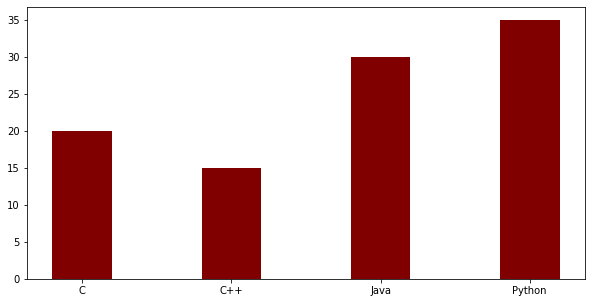

In [11]:

import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'C':20, 'C++':15, 'Java':30,
        'Python':35}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)